## Code to print the results as Bar Graphs

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

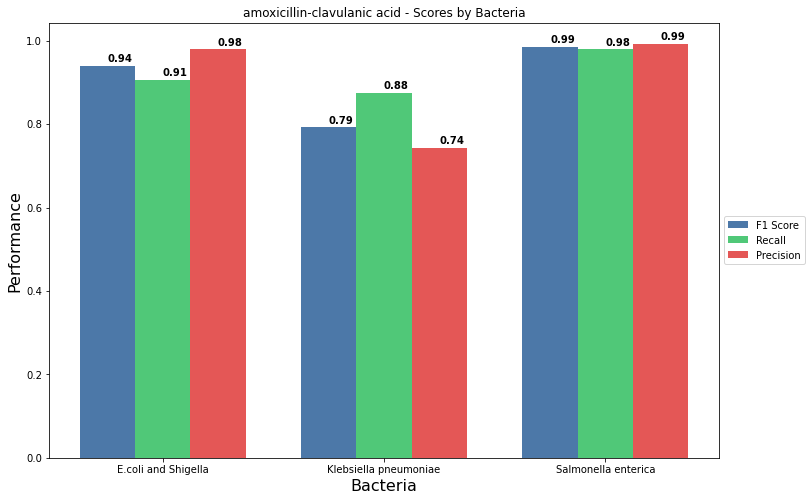

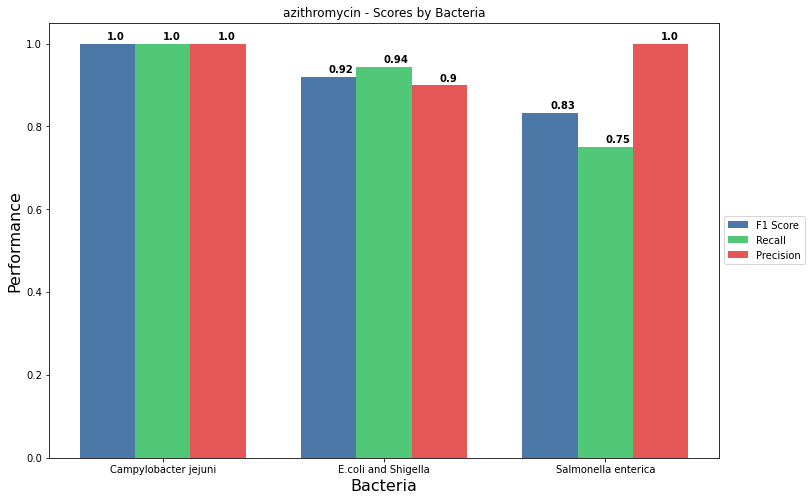

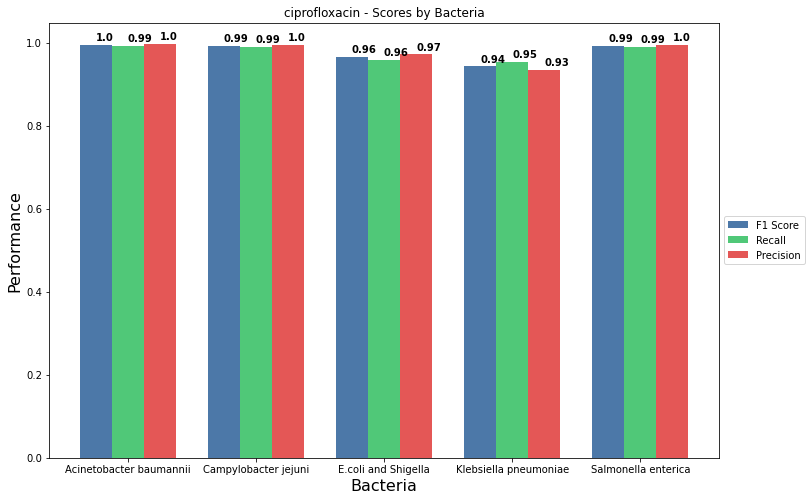

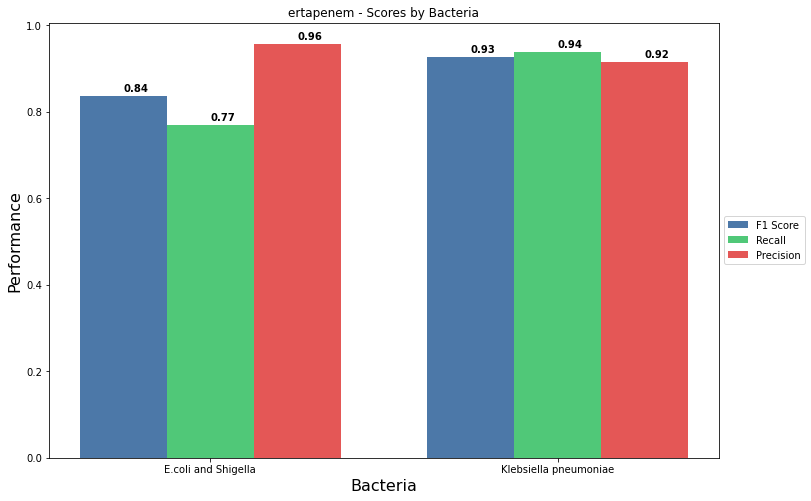

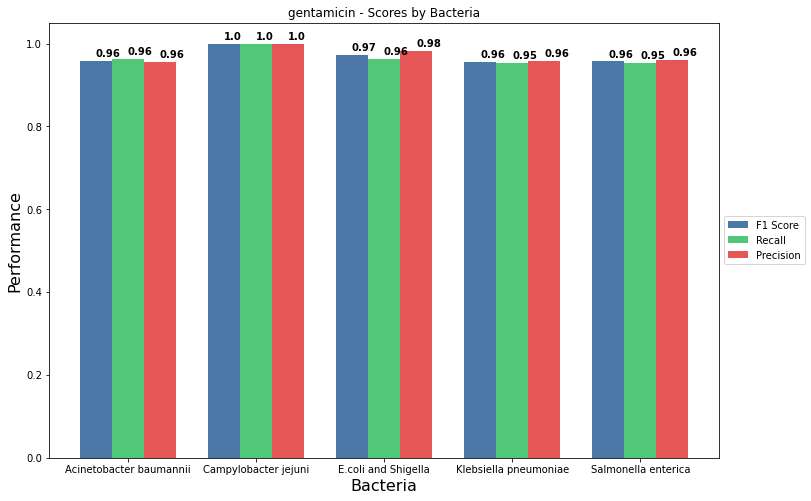

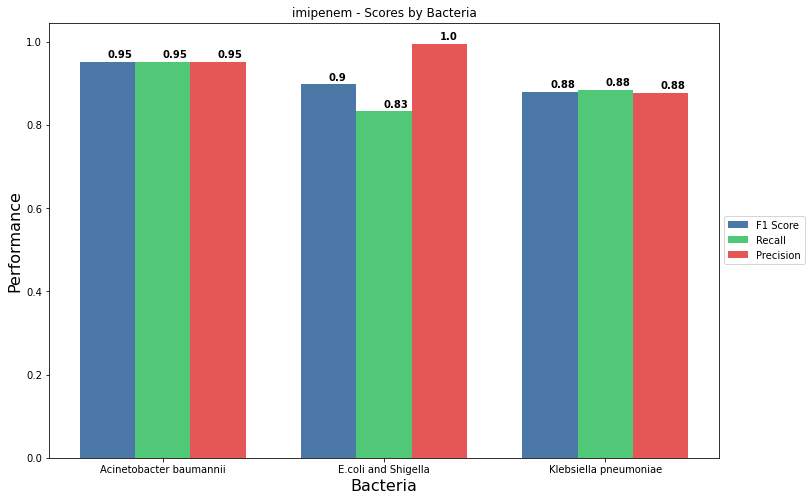

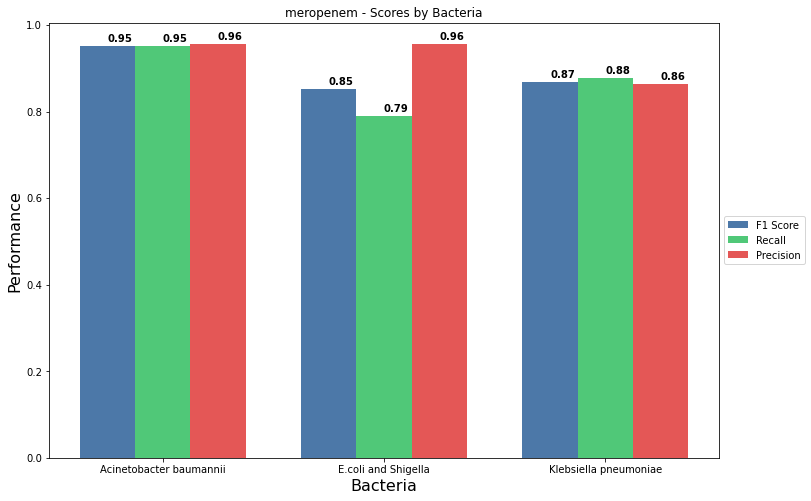

In [23]:
# Read the CSV file
df = pd.read_csv("./Best_statistical_model_on_all_datasets.csv")

# Group the data by Antibiotic Name
grouped = df.groupby("Antibiotic Name")

# Set the colors for the bars
colors = ["#4C78A8", "#50C878", "#E45756"]

# Set the width of the bars
bar_width = 0.25

# Iterate over each group
for antibiotic, data in grouped:

    # Create a new figure and set the size
    fig, ax = plt.subplots(figsize=(12, 8))

    # Group the data by Bacteria Name
    sub_grouped = data.groupby("Bacteria Name")

    # Create lists for the x and y axes
    bacteria_names = []
    f1_scores = []
    recall_scores = []
    precision_scores = []

    # Iterate over each sub-group
    for bacteria, sub_data in sub_grouped:

        # Add the bacteria name to the list
        bacteria_names.append(bacteria)

        # Get the F1 score, recall, and precision for the best performing classifier
        best_perf_classifier = sub_data.loc[sub_data["Best Performing Classifier"] == sub_data["Best Performing Classifier"].max()]
        f1_score = best_perf_classifier["Best F1 Score"].values[0]
        recall_score = best_perf_classifier["Recall"].values[0]
        precision_score = best_perf_classifier["Precision"].values[0]

        # Add the scores to the respective lists
        f1_scores.append(f1_score)
        recall_scores.append(recall_score)
        precision_scores.append(precision_score)

    # Set the x-axis labels
    x_labels = bacteria_names

    # Set the positions of the bars
    bar_positions = np.arange(len(bacteria_names))

    # Plot the bar graph
    plt.bar(bar_positions, f1_scores, color=colors[0], width=bar_width, label="F1 Score")
    plt.bar(bar_positions + bar_width, recall_scores, color=colors[1], width=bar_width, label="Recall")
    plt.bar(bar_positions + bar_width * 2, precision_scores, color=colors[2], width=bar_width, label="Precision")

    # Add labels and a title
    plt.xlabel("Bacteria", fontsize=16)
    plt.ylabel("Performance", fontsize=16)
    plt.title(f"{antibiotic} - Scores by Bacteria")

    # Set the x-axis ticks and labels
    plt.xticks(bar_positions + bar_width, x_labels)

    # Add the corresponding score value on top of each bar
    for i, v in enumerate(f1_scores):
        plt.text(i, v + 0.01, str(round(v, 2)), color='black', fontweight='bold')
        plt.text(i + bar_width, recall_scores[i] + 0.01, str(round(recall_scores[i], 2)), color='black', fontweight='bold')
        plt.text(i + bar_width * 2, precision_scores[i] + 0.01, str(round(precision_scores[i], 2)), color='black', fontweight='bold')

    # Move the legend outside of the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Show the plot
    plt.show()
